In [29]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
from scipy.stats import skewnorm, kurtosis, skew
import statsmodels.api as sm

# Loading the data

In [2]:
us_df = pd.read_csv('data/US_youtube_trending_data.csv')
br_df = pd.read_csv('data/BR_youtube_trending_data.csv')
ca_df = pd.read_csv('data/CA_youtube_trending_data.csv')
de_df = pd.read_csv('data/DE_youtube_trending_data.csv')
fr_df = pd.read_csv('data/FR_youtube_trending_data.csv')
gb_df = pd.read_csv('data/GB_youtube_trending_data.csv')
in_df = pd.read_csv('data/IN_youtube_trending_data.csv')
jp_df = pd.read_csv('data/JP_youtube_trending_data.csv')
kr_df = pd.read_csv('data/KR_youtube_trending_data.csv')
mx_df = pd.read_csv('data/MX_youtube_trending_data.csv')
ru_df = pd.read_csv('data/RU_youtube_trending_data.csv')

Checking for Nans in each df


In [3]:
dfs = [us_df, br_df, ca_df, de_df, fr_df, gb_df, in_df, jp_df, kr_df, mx_df, ru_df]

df_names = ['United States', 'Brazil', 'Canada', 'Germany', 'France', 'Great Britain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

for df in dfs:
    for column in df.columns:
        missing = df[column].isna().sum()
        if missing > 0:
            print(f"Missing values for {column}: {missing}")



Missing values for description: 3954
Missing values for description: 8556
Missing values for description: 4014
Missing values for description: 3851
Missing values for description: 3551
Missing values for description: 3931
Missing values for channelTitle: 1
Missing values for description: 17056
Missing values for description: 2522
Missing values for description: 3945
Missing values for description: 8215
Missing values for description: 5390


Since all the NaNs are in columns that won't be relevant for the analysis, I will drop the columns


In [4]:
for df in dfs:
    df.drop(columns = ['description', 'channelTitle'], inplace=True) 


Checking if columns were dropped

In [5]:
for df in dfs:
    print(df.columns.values)

['video_id' 'title' 'publishedAt' 'channelId' 'categoryId' 'trending_date'
 'tags' 'view_count' 'likes' 'dislikes' 'comment_count' 'thumbnail_link'
 'comments_disabled' 'ratings_disabled']
['video_id' 'title' 'publishedAt' 'channelId' 'categoryId' 'trending_date'
 'tags' 'view_count' 'likes' 'dislikes' 'comment_count' 'thumbnail_link'
 'comments_disabled' 'ratings_disabled']
['video_id' 'title' 'publishedAt' 'channelId' 'categoryId' 'trending_date'
 'tags' 'view_count' 'likes' 'dislikes' 'comment_count' 'thumbnail_link'
 'comments_disabled' 'ratings_disabled']
['video_id' 'title' 'publishedAt' 'channelId' 'categoryId' 'trending_date'
 'tags' 'view_count' 'likes' 'dislikes' 'comment_count' 'thumbnail_link'
 'comments_disabled' 'ratings_disabled']
['video_id' 'title' 'publishedAt' 'channelId' 'categoryId' 'trending_date'
 'tags' 'view_count' 'likes' 'dislikes' 'comment_count' 'thumbnail_link'
 'comments_disabled' 'ratings_disabled']
['video_id' 'title' 'publishedAt' 'channelId' 'category

### Correlation between view count, likes, dislikes, and comment count in each country

One way to quantify the relationship between two variables is to use the Pearson correlation coefficient, 
which is a measure of the linear association between two variables. It always takes on a value between 
-1 and 1 where:
- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables

The further away the correlation coefficient is from zero, the stronger the relationship between the 
two variables.

In [6]:
cols = ['view_count', 'likes', 'dislikes', 'comment_count']
columns = ['likes', 'dislikes', 'comment_count']
corr_df = pd.DataFrame(columns=columns)

for i in range(11):
    country = df_names[i]
    corr = dfs[i][cols].corr()
    values = {'likes':corr['likes'][0], 'dislikes':corr['dislikes'][0], 'comment_count':corr['comment_count'][0]}
    corr_df = corr_df.append(pd.Series(values, name=f'{country}'))
    print(country)
    print(corr)
    print()



/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(values, name=f'{country}'))


United States
               view_count     likes  dislikes  comment_count
view_count       1.000000  0.857855  0.541241       0.600710
likes            0.857855  1.000000  0.522417       0.741139
dislikes         0.541241  0.522417  1.000000       0.439076
comment_count    0.600710  0.741139  0.439076       1.000000

Brazil
               view_count     likes  dislikes  comment_count
view_count       1.000000  0.852487  0.593691       0.696236
likes            0.852487  1.000000  0.571968       0.780039
dislikes         0.593691  0.571968  1.000000       0.516200
comment_count    0.696236  0.780039  0.516200       1.000000

Canada
               view_count     likes  dislikes  comment_count
view_count       1.000000  0.831559  0.616765       0.528517
likes            0.831559  1.000000  0.549670       0.702779
dislikes         0.616765  0.549670  1.000000       0.460788
comment_count    0.528517  0.702779  0.460788       1.000000

Germany
               view_count     likes  dislikes 

/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(values, name=f'{country}'))
/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(values, name=f'{country}'))
/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(values, name=f'{country}'))
/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(values, name=f'{country}'))
/tmp/ipykernel_9034/230355266.py:9: FutureWarning: The frame.app

In [7]:
corr_df

,likes,dislikes,comment_count
United States,0.857855,0.541241,0.600710
Brazil,0.852487,0.593691,0.696236
Canada,0.831559,0.616765,0.528517
Germany,0.843391,0.567298,0.535633
France,0.875342,0.584070,0.733438
Great Britain,0.832515,0.578825,0.540916
India,0.811732,0.126517,0.472572
Japan,0.887897,0.571993,0.792025
South Korea,0.875150,0.521709,0.776264
Mexico,0.843445,0.531743,0.700486


Now I will focus on the correlation between likes, dislikes and comments to views
To better visualize it, I'll plot their values in a heatmap, for this I will use the previously created df with 
correlation values


[Text(0.5, 58.7222222222222, ''), Text(70.72222222222221, 0.5, 'VIEWS')]

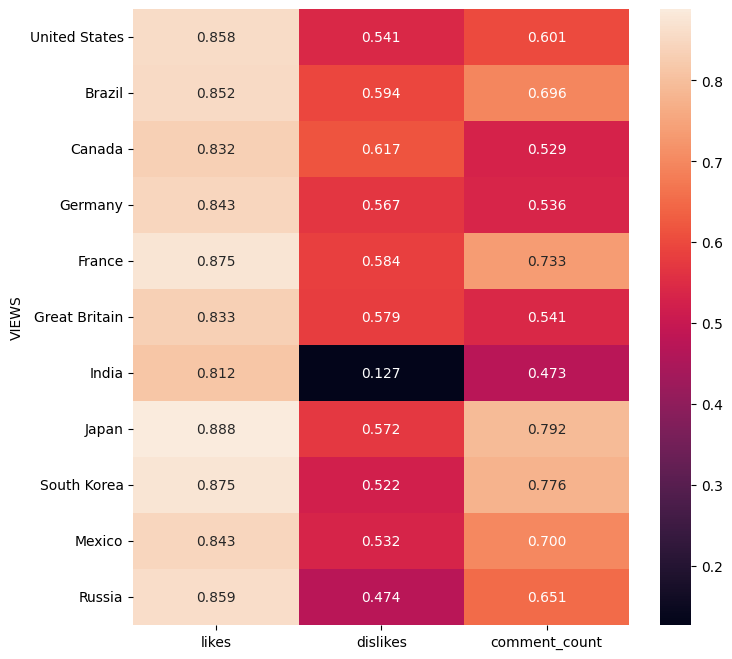

In [8]:
mplt.pyplot.figure(figsize=(8,8))
heatmap = sns.heatmap(corr_df, annot=True, xticklabels=True, yticklabels=True, fmt=".3f")
heatmap.set(xlabel="", ylabel="VIEWS")


We can see that the strongest correlation is between views and likes, and it is a trend that stays 
accross countries. Then, for dislikes countries also share a similar strengh of correlation with the 
exception of India where it becomes significantly weaker. Lastly, comment count 

### ANOVA TESTING

Is the country a video is from significant when it comes to the amount of views it gets?


In [10]:
# Creating new df containing views per country

df_views = pd.DataFrame(columns=['views_us', 'views_brazil', 'views_canada', 'views_germany', 'views_france', 'views_gb', 'views_india',
                                'views_japan', 'views_korea', 'views_mexico', 'views_russia'])

df_views['views_us'] = us_df.filter(['view_count'])
df_views['views_brazil'] = br_df.filter(['view_count'])
df_views['views_canada'] = ca_df.filter(['view_count'])
df_views['views_germany'] = de_df.filter(['view_count'])
df_views['views_france'] = fr_df.filter(['view_count'])
df_views['views_gb'] = gb_df.filter(['view_count'])
df_views['views_india'] = in_df.filter(['view_count'])
df_views['views_japan'] = jp_df.filter(['view_count'])
df_views['views_korea'] = kr_df.filter(['view_count'])
df_views['views_mexico'] = mx_df.filter(['view_count'])
df_views['views_russia'] = ru_df.filter(['view_count'])

df_views

,views_us,views_brazil,views_canada,views_germany,views_france,views_gb,views_india,views_japan,views_korea,views_mexico,views_russia
0,1514614,263835,9140911.0,573902.0,1943013,2038853,9885899.0,778499.0,5947503.0,741028.0,5173063.0
1,2381688,6000070,2038853.0,381375.0,1823553,236830,11308046.0,1161952.0,963384.0,402507.0,636749.0
2,2038853,2296748,2381688.0,142296.0,196340,2381688,9140911.0,1980557.0,2950885.0,735044.0,359904.0
3,496771,300510,1514614.0,55640.0,311609,613785,23564512.0,2381688.0,1743374.0,521751.0,355978.0
4,1123889,327235,1123889.0,233899.0,100691,940036,6783649.0,442524.0,3433885.0,168118.0,428221.0
...,...,...,...,...,...,...,...,...,...,...,...
176385,1248567,1466034,NaN,NaN,312712,2179544,NaN,NaN,NaN,NaN,NaN
176386,1905018,1563810,NaN,NaN,744860,628880,NaN,NaN,NaN,NaN,NaN
176387,688217,6664658,NaN,NaN,103054,508330,NaN,NaN,NaN,NaN,NaN
176388,733029,177206,NaN,NaN,2684820,1374329,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking for Nans

for column in df_views.columns:
        missing = df_views[column].isna().sum()
        if missing > 0:
            print(f"Missing values for {column}: {missing}")

Missing values for views_canada: 47
Missing values for views_germany: 52
Missing values for views_india: 7706
Missing values for views_japan: 9
Missing values for views_korea: 3036
Missing values for views_mexico: 192
Missing values for views_russia: 6891


Dropping rows with Nans

In [12]:
df_views = df_views.dropna()
df_views

,views_us,views_brazil,views_canada,views_germany,views_france,views_gb,views_india,views_japan,views_korea,views_mexico,views_russia
0,1514614,263835,9140911.0,573902.0,1943013,2038853,9885899.0,778499.0,5947503.0,741028.0,5173063.0
1,2381688,6000070,2038853.0,381375.0,1823553,236830,11308046.0,1161952.0,963384.0,402507.0,636749.0
2,2038853,2296748,2381688.0,142296.0,196340,2381688,9140911.0,1980557.0,2950885.0,735044.0,359904.0
3,496771,300510,1514614.0,55640.0,311609,613785,23564512.0,2381688.0,1743374.0,521751.0,355978.0
4,1123889,327235,1123889.0,233899.0,100691,940036,6783649.0,442524.0,3433885.0,168118.0,428221.0
...,...,...,...,...,...,...,...,...,...,...,...
168679,267411,1470659,317342.0,280945.0,92683,10018512,249444.0,1756826.0,707711.0,504392.0,413163.0
168680,2899586,763553,446292.0,424306.0,988434,2369693,405516.0,498944.0,2264550.0,447525.0,360357.0
168681,1957919,2499385,969978.0,347592.0,291133,997041,1253875.0,422629.0,1470577.0,1981454.0,444470.0
168682,45987,603547,1479600.0,4168613.0,385063,1301187,2094335.0,653587.0,734125.0,1254904.0,147329.0


In [13]:
df_views.isnull().sum()


views_us         0
views_brazil     0
views_canada     0
views_germany    0
views_france     0
views_gb         0
views_india      0
views_japan      0
views_korea      0
views_mexico     0
views_russia     0
dtype: int64

### Start of ANOVA testing

In [14]:
mean_us = df_views['views_us'].mean()
mean_br = df_views['views_brazil'].mean()
mean_ca = df_views['views_canada'].mean()
mean_ge = df_views['views_germany'].mean()
mean_fr = df_views['views_france'].mean()
mean_gb = df_views['views_gb'].mean()
mean_in = df_views['views_india'].mean()
mean_ja = df_views['views_japan'].mean()
mean_ko = df_views['views_korea'].mean()
mean_mx = df_views['views_mexico'].mean()
mean_ru = df_views['views_russia'].mean()
grand_mean = (mean_ko + mean_mx + mean_ru + mean_us + mean_br + mean_ca + mean_ge + mean_fr 
             + mean_gb + mean_in + mean_ja)/11

print(mean_us)
print(mean_br)
print(mean_ca)
print(mean_ge)
print(mean_fr)
print(mean_gb)
print(mean_in)
print(mean_ja)
print(mean_ko)
print(mean_mx)
print(mean_ru)
print(grand_mean)


2558086.1389046977
1517996.237319485
2446396.9244919494
1647087.1136503757
1023985.4015259302
2236782.8755305777
3071780.654555263
1282246.631328401
1721571.2246863958
2255882.095207607
759751.5037347941
1865596.981903225


In [15]:
total_sum_squared = 0

for column in df_views.columns:
    for value in df_views[column]:
        total_sum_squared += (value - grand_mean)**2
print(f'TOTAL sum squared: {total_sum_squared}')

TOTAL sum squared: 6.413094469291328e+19


In [16]:
# SS for US
sum_squared_us = 0
for value in df_views['views_us']:
    sum_squared_us += (value - mean_us)**2
print(f'Total sum squared for US: {sum_squared_us}')

# SS for Brazil
sum_squared_br = 0
for value in df_views['views_brazil']:
    sum_squared_br += (value - mean_br)**2
print(f'Total sum squared for Brazil: {sum_squared_br}')

# SS for Canada
sum_squared_ca = 0
for value in df_views['views_canada']:
    sum_squared_ca += (value - mean_ca)**2
print(f'Total sum squared for Canada: {sum_squared_ca}')

# SS for Germany
sum_squared_ge = 0
for value in df_views['views_germany']:
    sum_squared_ge += (value - mean_ge)**2
print(f'Total sum squared for Germany: {sum_squared_ge}')

# SS for France
sum_squared_fr = 0
for value in df_views['views_france']:
    sum_squared_fr += (value - mean_fr)**2
print(f'Total sum squared for France: {sum_squared_fr}')

# SS for GB
sum_squared_gb = 0
for value in df_views['views_gb']:
    sum_squared_gb += (value - mean_gb)**2
print(f'Total sum squared for GB: {sum_squared_gb}')

# SS for India
sum_squared_in = 0
for value in df_views['views_india']:
    sum_squared_in += (value - mean_in)**2
print(f'Total sum squared for India: {sum_squared_in}')

# SS for Japan
sum_squared_ja = 0
for value in df_views['views_japan']:
    sum_squared_ja += (value - mean_ja)**2
print(f'Total sum squared for Japan: {sum_squared_ja}')

# SS for Korea
sum_squared_ko = 0
for value in df_views['views_korea']:
    sum_squared_ko += (value - mean_ko)**2
print(f'Total sum squared for Korea: {sum_squared_ko}')

# SS for Mexico
sum_squared_mx = 0
for value in df_views['views_mexico']:
    sum_squared_mx += (value - mean_mx)**2
print(f'Total sum squared for Mexico: {sum_squared_mx}')

# SS for Russia
sum_squared_ru = 0
for value in df_views['views_russia']:
    sum_squared_ru += (value - mean_ru)**2
print(f'Total sum squared for Russia: {sum_squared_ru}')

# SS for RESIDUAL
sum_squared_residual =(sum_squared_us + sum_squared_br + sum_squared_ca + sum_squared_ge + sum_squared_fr + sum_squared_gb 
                        + sum_squared_in + sum_squared_ja + sum_squared_ko + sum_squared_mx + sum_squared_ru)
print(f'TOTAL SUM SQUARE FOR RESIDUAL: {sum_squared_residual}')

Total sum squared for US: 8.598416453477027e+18
Total sum squared for Brazil: 5.015896919670449e+18
Total sum squared for Canada: 6.713183195110025e+18
Total sum squared for Germany: 5.319803587619719e+18
Total sum squared for France: 3.0643256548323697e+18
Total sum squared for GB: 5.866537189204922e+18
Total sum squared for India: 9.151008315560402e+18
Total sum squared for Japan: 4.69519582911954e+18
Total sum squared for Korea: 7.365415131397499e+18
Total sum squared for Mexico: 6.161497002406015e+18
Total sum squared for Russia: 1.3324216080826655e+18
TOTAL SUM SQUARE FOR RESIDUAL: 6.328370088648063e+19


In [17]:
# sum country
sum_country = total_sum_squared - sum_squared_residual
print(f'Total sum COUNTRY: {sum_country}')

Total sum COUNTRY: 8.472438064326492e+17


In [19]:
# Degrees of freedom for total
df_total = (len(df_views.index) * len(df_views.columns)) - 1
print(f'Total degrees of freedom: {df_total}')

# Degrees of freedom for country
df_country = len(df_views.columns) - 1
print(f'Degrees of freedom for country: {df_country}')

# Degrees of freedon for residual
df_residual = df_total - df_country
print(f'Degrees of freedom for residual: {df_residual}')

Total degrees of freedom: 1855523
Degrees of freedom for country: 10
Degrees of freedom for residual: 1855513


In [20]:
# Mean squared total
mean_squared_total = total_sum_squared / df_total
print(f'Mean squared total : {mean_squared_total}')

# Mean squared RESIDUAL
mean_squared_residual = sum_squared_residual / df_residual
print(f'Mean squared country : {mean_squared_residual}')

# Mean squared COUNTRY
mean_squared_country = sum_country / df_country
print(f'Mean squared residual : {mean_squared_country}')

Mean squared total : 34562193350830.62
Mean squared country : 34105770687934.082
Mean squared residual : 8.472438064326493e+16


In [37]:
# F-ratio for country

f_country = mean_squared_country / mean_squared_residual
print(f"The calculated f value is: {f_country}")

f_value = sci.f.ppf(q=0.05, dfn=10, dfd=1855513)
print(f_value)


p = 1-sci.f.cdf(f_value, dfn=10, dfd=1855513) #find p-value of F test statistic 
print(f"The p value is: {p}")


The calculated f value is: 2484.165551293015
0.39402948261802545
The p value is: 0.9500000000001382


Since 2.930 > 0.394, the effect of country on views is significant

### Linear regression 

In [23]:
regression_df = pd.DataFrame()

for df in dfs :
    df.drop(columns = ['ratings_disabled','comments_disabled','thumbnail_link','tags','trending_date','categoryId', 'channelId', 'video_id', 'title', 'publishedAt'], inplace=True) 
    regression_df = pd.concat([regression_df, df[df['view_count'] >= 0]])


In [26]:
regression_df.head()

,view_count,likes,dislikes,comment_count
0,1514614,156908,5855,35313
1,2381688,146739,2794,16549
2,2038853,353787,2628,40221
3,496771,23251,1856,7647
4,1123889,45802,964,2196


In [53]:
Y = df['view_count']
X = df[['likes', 'dislikes', 'comment_count']]
X = sm.add_constant(X)

In [ ]:
plt.hist(Y, bins=np.arange(Y.min(), Y.max()+1))


In [54]:
print("Skewness: {}, Kurtosis: {}".format(skew(Y), kurtosis(Y)))

Skewness: 23.8740741573001, Kurtosis: 950.0142200979138


In [56]:
ks = sm.OLS(Y, X)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                 1.641e+05
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:12:28   Log-Likelihood:            -2.6420e+06
No. Observations:              169499   AIC:                         5.284e+06
Df Residuals:                  169495   BIC:                         5.284e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.907e+05   3582.038     53.244      0.000    1.84e+05    1.98e+05
likes            10.7375      0.025    433.431      0.000      10.689      10.786
dislikes         46.2001      0.722     63.984      0.000      44.785      47.615
comment_count    -2.2875      0.110    -20.785      0.000      -2.503      -2.072
==============================================================================
Omnibus:                   316949.406   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2336822914.244
Skew:                          13.618   Prob(JB):                         0.00
Kurtosis:                     577.576   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

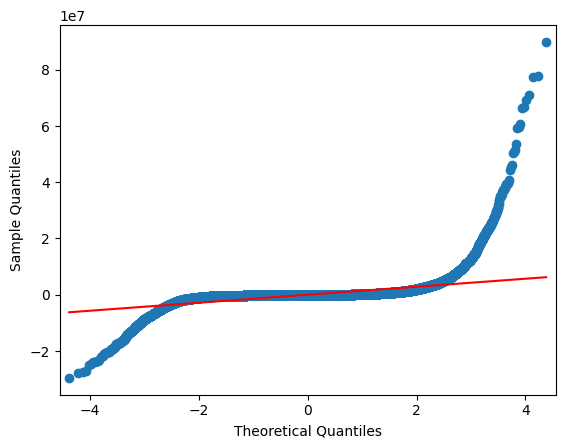

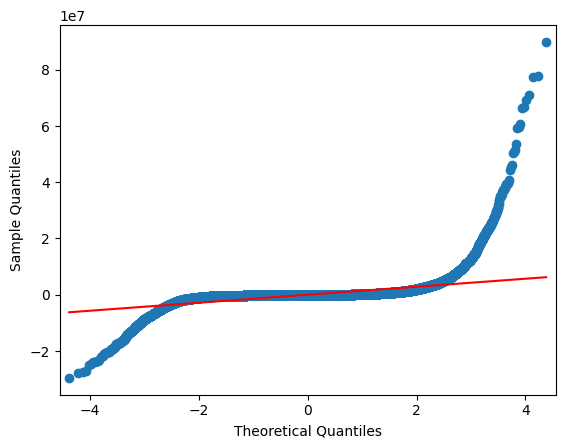

In [36]:
sm.qqplot(ks_res.resid, line='s')